Algoritmo apriori
=========================

Primero necesitamos conocer los siguientes conceptos:

* Soporte: el soporte del item $X$ es el número de transacciones que contienen al individuo $X$ dividido entre el total de transacciones, $sup(X) = \frac{freq(X)}{N}$.

* Confianza: la confianza de una regla $X => Y$ es la probabilidad de que en una transacción que contenga $X$, también contenga $Y$, $conf(X => Y) = \frac{freq(X, Y)}{N}$.

* Mejora de la confianza:  $lift(X => Y) = \frac{conf(X => Y)}{sup(Y)}$.

El algoritmo es el siguiente:

1.- Se obtienen los itemsets frecuentes.

* a. Se seleccionan los items (formando así un itemset de un elemento) y se calcula su soporte.

* b. Se eliminan aquellos itemsets que tengan un $sup(X)$ menor que un umbral de soporte.

* c. Se crean nuevos itemsets uniendo los restantes.

* d. Se repite b. y c. hasta no tener más itemsets que crear.
    
2.- Se crean las reglas de asociación.

* a. Por cada itemset frecuente $I$, se generan todos los posibles subconjuntos de $I$ y se crea la regla $S => (I - S)$.

* b. Se calcula la confianza de cada subconjunto y se eliminan aquellas que estén por debajo de un umbral de confianza.

3.- Se ordenan las reglas generadas respecto al lift.

<center>

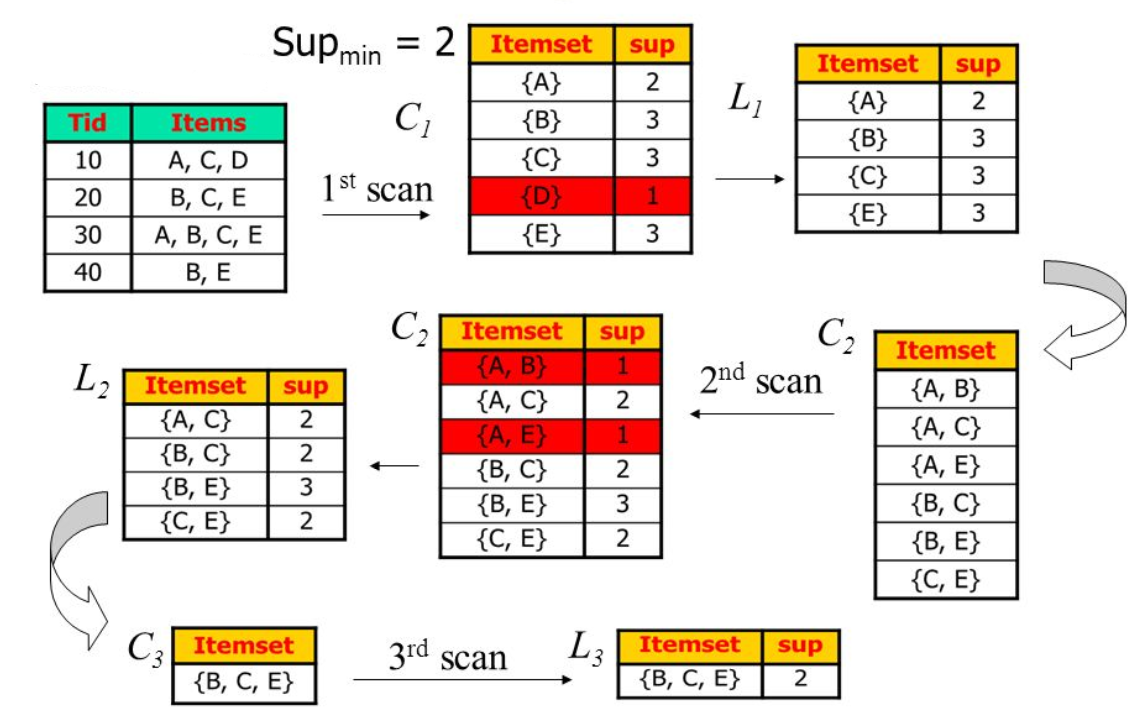

</center>

Implementación
=========================

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Market_Basket_Optimisation.csv', header = None).astype(str)

In [47]:
# Preprocesado de datos
new_dataset = dataset.values.tolist()

# Aplicamos el algoritmo de Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 1]

print(frequent_itemsets)

       support                                           itemsets  length
0     0.020397                                          (almonds)       1
1     0.008932                                (antioxydant juice)       1
2     0.004666                                        (asparagus)       1
3     0.033329                                          (avocado)       1
4     0.004533                                      (babies food)       1
...        ...                                                ...     ...
2881  0.003066  (ground beef, spaghetti, pancakes, mineral wat...       5
2882  0.003066  (tomatoes, ground beef, spaghetti, mineral wat...       5
2883  0.003333   (olive oil, spaghetti, milk, mineral water, nan)       5
2884  0.003066      (spaghetti, milk, shrimp, mineral water, nan)       5
2885  0.003333    (tomatoes, spaghetti, milk, mineral water, nan)       5

[2886 rows x 3 columns]


In [81]:
# Obtenemos las reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))


# Eliminar las reglas que no tienen consecuente
rules = rules[rules['consequents'] != {'nan'}]
rules = rules[rules['consequents'].apply(lambda x: 'nan' not in x)]

# Eliminar las reglas que no tienen antecedente
rules = rules[rules['antecedents'] != {'nan'}]
rules = rules[rules['antecedents'].apply(lambda x: 'nan' not in x)]

rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])
print(rules)

                                  antecedents  \
14107         (milk, frozen vegetables, soup)   
14092    (milk, frozen vegetables, olive oil)   
3036                   (cereals, ground beef)   
13896  (milk, frozen vegetables, ground beef)   
6425                (frozen vegetables, soup)   
...                                       ...   
1653                          (mineral water)   
3993                          (mineral water)   
12301                         (mineral water)   
67                            (mineral water)   
5679                          (mineral water)   

                            consequents  antecedent support  \
14107                   (mineral water)            0.003999   
14092                   (mineral water)            0.004799   
3036                        (spaghetti)            0.004533   
13896                   (mineral water)            0.005733   
6425                    (mineral water)            0.007999   
...                              

Referencias:

https://iq.opengenus.org/apriori-associative-learning/